In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import zscore


dd = Path().cwd().parent.parent / 'data'

#dd = Path('/workspaces/marketing-data/data')

We will be using [Census Reporter](https://censusreporter.org) to get census data. This urldata comes from the "download" menu on the page for [San Diego COunty, Sex by Age, aggregated to census tracts.](https://censusreporter.org/data/table/?table=B01001&geo_ids=05000US06073,140|05000US06073&primary_geo_id=05000US06073)  

In [42]:
gdf = gpd.read_file(dd / 'acs2022_5yr_B01001_14000US06073011802.geojson')
gdf.head()

,geoid,name,B01001001,"B01001001, Error",B01001002,"B01001002, Error",B01001003,"B01001003, Error",B01001004,"B01001004, Error",...,"B01001045, Error",B01001046,"B01001046, Error",B01001047,"B01001047, Error",B01001048,"B01001048, Error",B01001049,"B01001049, Error",geometry
0,05000US06073,"San Diego County, CA",3289701.0,NaN,1667851.0,NaN,97861.0,NaN,96806.0,2019.0,...,1533.0,66546.0,1568.0,47881.0,1225.0,32278.0,1224.0,36766.0,1343.0,"MULTIPOLYGON (((-116.7573 32.56551, -116.76272..."
1,14000US06073000100,"Census Tract 1, San Diego, CA",3027.0,373.0,1466.0,222.0,237.0,119.0,65.0,53.0,...,28.0,147.0,80.0,105.0,55.0,74.0,51.0,45.0,32.0,"MULTIPOLYGON (((-117.1949 32.75278, -117.19471..."
2,14000US06073000201,"Census Tract 2.01, San Diego, CA",2294.0,331.0,1101.0,186.0,16.0,21.0,30.0,36.0,...,39.0,109.0,50.0,85.0,54.0,10.0,16.0,126.0,58.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
3,14000US06073000202,"Census Tract 2.02, San Diego, CA",3919.0,369.0,2078.0,258.0,53.0,55.0,58.0,59.0,...,13.0,163.0,133.0,65.0,54.0,40.0,39.0,60.0,45.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
4,14000US06073000301,"Census Tract 3.01, San Diego, CA",2340.0,363.0,1304.0,328.0,0.0,13.0,13.0,22.0,...,36.0,64.0,46.0,57.0,48.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."


To calculate population density, we will also need the land are for the tracts, which is not in the Census Reporter files, so we get the census geography files, which were downloaded from the [Census TigerLine server. ](https://www.census.gov/cgi-bin/geo/shapefiles/index.php)

In [43]:
ca_tract = gpd.read_file('../../data/tl_2022_06_tract.zip')
ca_tract = ca_tract.rename(columns={'GEOID':'geoid', 'ALAND': 'area'})

# Fix the geoid format to match the Census reporter file
ca_tract.geoid = '14000US'+ca_tract.geoid

# For area calculations, should have the same coordinate system
ca_tract.to_crs(gdf.crs)


ca_tract.head()


,STATEFP,COUNTYFP,TRACTCE,geoid,NAME,NAMELSAD,MTFCC,FUNCSTAT,area,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,137504,14000US06037137504,1375.04,Census Tract 1375.04,G5020,S,3837562,0,+34.1480383,-118.5720594,"POLYGON ((-118.58119 34.14318, -118.58099 34.1..."
1,06,037,138000,14000US06037138000,1380,Census Tract 1380,G5020,S,4472196,0,+34.1488008,-118.5910495,"POLYGON ((-118.60573 34.14585, -118.60561 34.1..."
2,06,037,139200,14000US06037139200,1392,Census Tract 1392,G5020,S,1152028,0,+34.1756961,-118.5246446,"POLYGON ((-118.53082 34.18024, -118.52952 34.1..."
3,06,087,120901,14000US06087120901,1209.01,Census Tract 1209.01,G5020,S,18372491,0,+37.0781624,-122.0154263,"POLYGON ((-122.04607 37.07105, -122.04505 37.0..."
4,06,087,120902,14000US06087120902,1209.02,Census Tract 1209.02,G5020,S,6474889,0,+37.0628452,-122.0106243,"POLYGON ((-122.02513 37.0432, -122.025 37.0432..."


In [44]:
# Add in the area
t = gdf.merge(ca_tract[['geoid','area']], on='geoid')

t.head()
#gdf.plot(column='B01001001')


,geoid,name,B01001001,"B01001001, Error",B01001002,"B01001002, Error",B01001003,"B01001003, Error",B01001004,"B01001004, Error",...,B01001046,"B01001046, Error",B01001047,"B01001047, Error",B01001048,"B01001048, Error",B01001049,"B01001049, Error",geometry,area
0,14000US06073000100,"Census Tract 1, San Diego, CA",3027.0,373.0,1466.0,222.0,237.0,119.0,65.0,53.0,...,147.0,80.0,105.0,55.0,74.0,51.0,45.0,32.0,"MULTIPOLYGON (((-117.1949 32.75278, -117.19471...",1536251
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",2294.0,331.0,1101.0,186.0,16.0,21.0,30.0,36.0,...,109.0,50.0,85.0,54.0,10.0,16.0,126.0,58.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779...",864211
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",3919.0,369.0,2078.0,258.0,53.0,55.0,58.0,59.0,...,163.0,133.0,65.0,54.0,40.0,39.0,60.0,45.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838...",1305997
3,14000US06073000301,"Census Tract 3.01, San Diego, CA",2340.0,363.0,1304.0,328.0,0.0,13.0,13.0,22.0,...,64.0,46.0,57.0,48.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684...",401792
4,14000US06073000302,"Census Tract 3.02, San Diego, CA",2934.0,392.0,1437.0,340.0,17.0,28.0,0.0,13.0,...,154.0,99.0,36.0,52.0,42.0,40.0,51.0,43.0,"MULTIPOLYGON (((-117.164 32.74091, -117.164 32...",496970


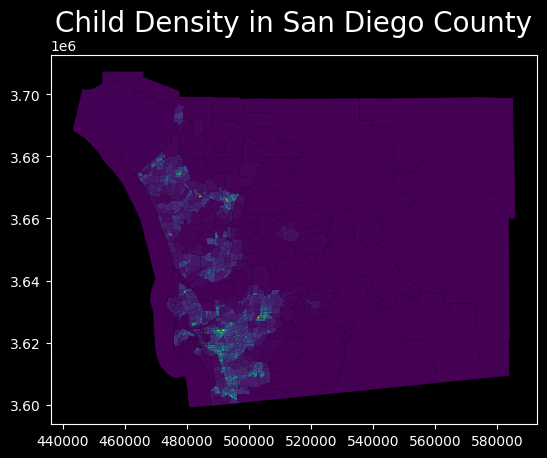

In [45]:
t  = t.to_crs(epsg='32611')  # UTM Zone 11N, which covers california
# Calculate the number of children from 0 to 18. 
t['boys'] =  t.B01001003 + t.B01001004 + t.B01001005 + t.B01001006 + t.B01001007 
t['girls'] = t.B01001027 + t.B01001028 + t.B01001029 + t.B01001030 + t.B01001031
t['child'] = t.boys + t.girls

t['child_density'] = t.child / t.area

fig, ax = plt.subplots(1, 1)
t.plot(ax=ax, column='child_density')
ax.set_title('Child Density in San Diego County', fontdict={'fontsize': 20, 'fontweight': 'medium'})


t.to_file(dd / "child_density.geojson", driver='GeoJSON')

chld = t[['geoid', 'name','area', 'boys', 'girls', 'child', 'child_density','geometry']].copy()


Text(0.5, 1.0, 'Child Density in San Diego County')

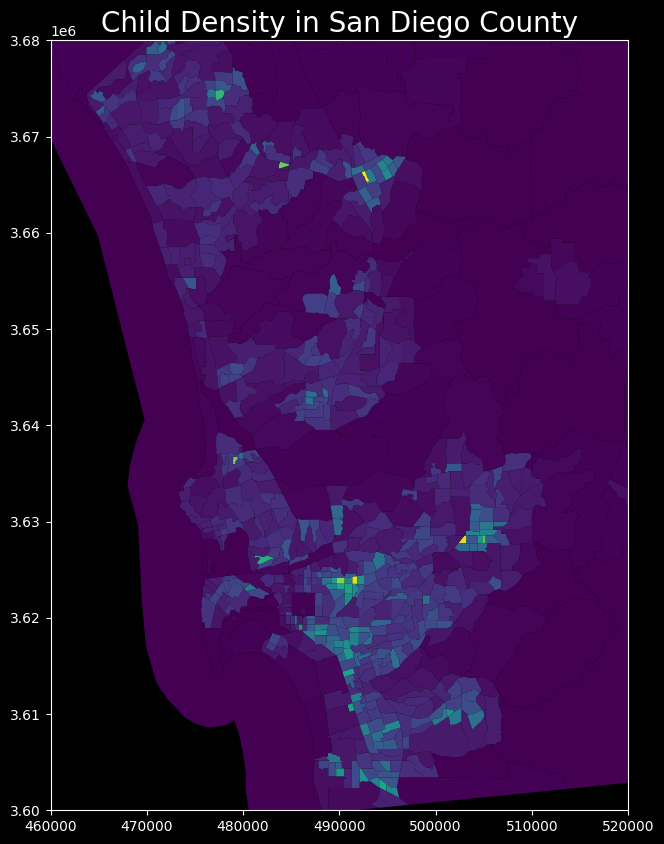

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))


# Set the x and y limits to the specified bounds
ax.set_xlim(460000, 520000)
ax.set_ylim(3600000, 3680000)

t.plot(ax=ax, column='child_density')
ax.set_title('Child Density in San Diego County', fontdict={'fontsize': 20, 'fontweight': 'medium'})


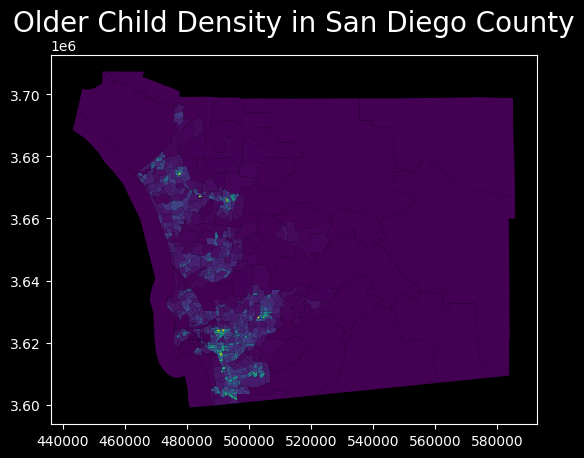

In [47]:
# Older Kids

t  = t.to_crs(epsg='32611')  # UTM Zone 11N, which covers california
# Calculate the number of children from 10 to 17. 
t['boys'] =  t.B01001005 + t.B01001006 
t['girls'] = t.B01001029 + t.B01001030 
t['child'] = t.boys + t.girls

t['child_density'] = t.child / t.area

fig, ax = plt.subplots(1, 1)
t.plot(ax=ax, column='child_density')
ax.set_title('Older Child Density in San Diego County', fontdict={'fontsize': 20, 'fontweight': 'medium'})


t.to_file(dd / "older_child_density.geojson", driver='GeoJSON')

c_den = t


In [48]:
inc = gpd.read_file(dd /'acs2022_5yr_median_household_income.geojson')
inc.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,05000US06073,"San Diego County, CA",96974.0,993.0,"MULTIPOLYGON (((-116.7573 32.56551, -116.76272..."
1,14000US06073000100,"Census Tract 1, San Diego, CA",194643.0,62531.0,"MULTIPOLYGON (((-117.1949 32.75278, -117.19471..."
2,14000US06073000201,"Census Tract 2.01, San Diego, CA",115449.0,25557.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
3,14000US06073000202,"Census Tract 2.02, San Diego, CA",108780.0,14233.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
4,14000US06073000301,"Census Tract 3.01, San Diego, CA",92619.0,12204.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."


In [49]:
t = c_den[['geoid','child_density','geometry']].merge(inc[['geoid','B19013001']]).rename(columns={'B19013001': 'med_income'})
t = t[['geoid', 'child_density', 'med_income', 'geometry']].copy()

t['cd_pct'] = t['child_density'].rank(pct=True)
t['cd_z'] = zscore(t['child_density'])

t['med_income'] = t.med_income.fillna(t.med_income.mean())
t['mi_pct'] = t['med_income'].rank(pct=True)
t['mi_z'] = zscore(t['med_income'])

t['metric'] = t.mi_pct * t.cd_pct

df = t
df.to_file(dd / "cd_mi.geojson", driver='GeoJSON')


df.head()

,geoid,child_density,med_income,geometry,cd_pct,cd_z,mi_pct,mi_z,metric
0,14000US06073000100,0.000145,194643.0,"MULTIPOLYGON (((481742.259 3623897.455, 481760...",0.407056,-0.426396,0.960651,2.130248,0.391039
1,14000US06073000201,0.000250,115449.0,"MULTIPOLYGON (((483245.448 3624434.672, 483329...",0.644505,-0.016972,0.655360,0.241582,0.422382
2,14000US06073000202,0.000151,108780.0,"MULTIPOLYGON (((482758.309 3623111.883, 482778...",0.417910,-0.401796,0.605156,0.082536,0.252901
3,14000US06073000301,0.000075,92619.0,"MULTIPOLYGON (((484201.416 3623470.65, 484223....",0.219810,-0.697612,0.432836,-0.302881,0.095142
4,14000US06073000302,0.000024,85568.0,"MULTIPOLYGON (((484634.706 3622576.581, 484635...",0.116689,-0.893794,0.352782,-0.471038,0.041166


Text(0.5, 1.0, 'Child Density x Money in San Diego County')

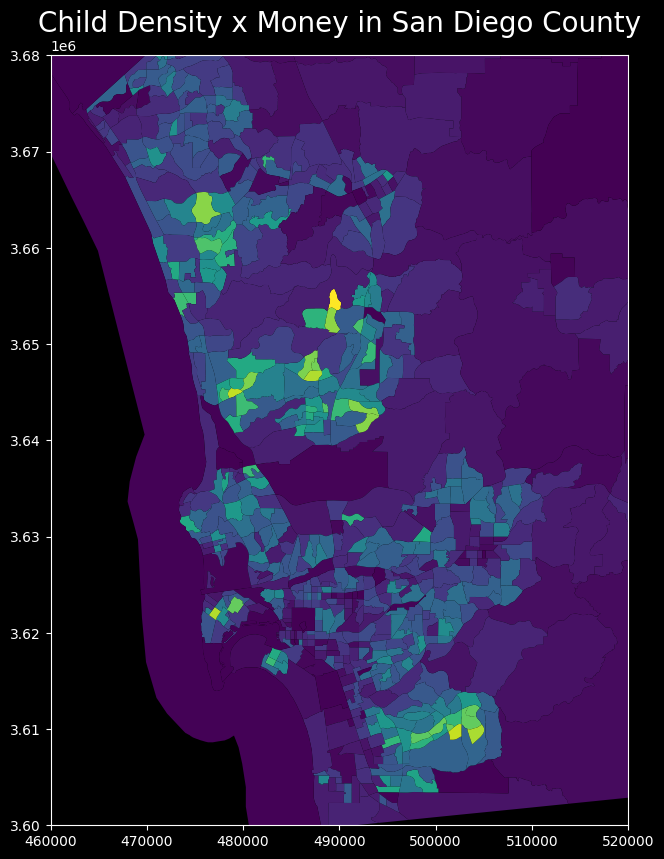

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))


# Set the x and y limits to the specified bounds
ax.set_xlim(460000, 520000)
ax.set_ylim(3600000, 3680000)

df.plot(ax=ax, column='metric')
ax.set_title('Child Density x Money in San Diego County', fontdict={'fontsize': 20, 'fontweight': 'medium'})


In [51]:
from shapely.wkt import loads

territories = gpd.read_file(dd / 'territories.geojson')
territories['isochrone'] = territories['isochrone'].apply(loads)
territories = gpd.GeoDataFrame(territories, geometry='isochrone')

territories = territories.set_crs(epsg=4326)
territories = territories.to_crs(chld.crs)

territories['cid'] = territories['Company'] + '-' + territories.index.astype(str)

t = chld.sjoin(territories[['cid', 'isochrone']], how='left', predicate='intersects')

t = t.merge(inc[['geoid', 'B19013001']], on='geoid', how='left')


t.columns
t = t.rename(columns={'B19013001': 'med_income'}).drop(columns=['index_right'])
t['med_income'] = t.med_income.fillna(t.med_income.mean()) 


# Number of competitors in that tract
t['ccount'] = t.groupby('geoid')['cid'].transform('nunique')

t = t[t.ccount > 0]

# CHildren per competitor
t['comp_child']  = t.child / t.ccount

t['over_med'] = t.med_income - t.drop_duplicates(subset=['geoid']).med_income.median()

ter_chld = t



In [52]:
t = ter_chld[ter_chld.over_med > 0]
t.groupby('cid').comp_child.sum().sort_values()


# Group by 'cid' and sum the 'child' column
child_sum =t.groupby('cid').comp_child.sum().sort_values().astype(int)

# Convert the result to a DataFrame for better HTML display
child_sum_df = child_sum.reset_index().rename(columns={'child': 'Total Children'}).sort_values('cid')

# Display as HTML
child_sum_df



,cid,comp_child
4,Busboom Garage-10,10477
10,Code Ninjas-3,18516
9,Code Ninjas-4,17329
2,Code Ninjas-5,9703
11,Code Ninjas-6,44042
7,Ember Coding-7,17117
1,Liberty Station-11,9652
8,The Coder School-0,17117
6,The Coder School-1,16657
0,The Coder School-2,5796


Text(0.5, 1.0, '75pct for Kids and Income')

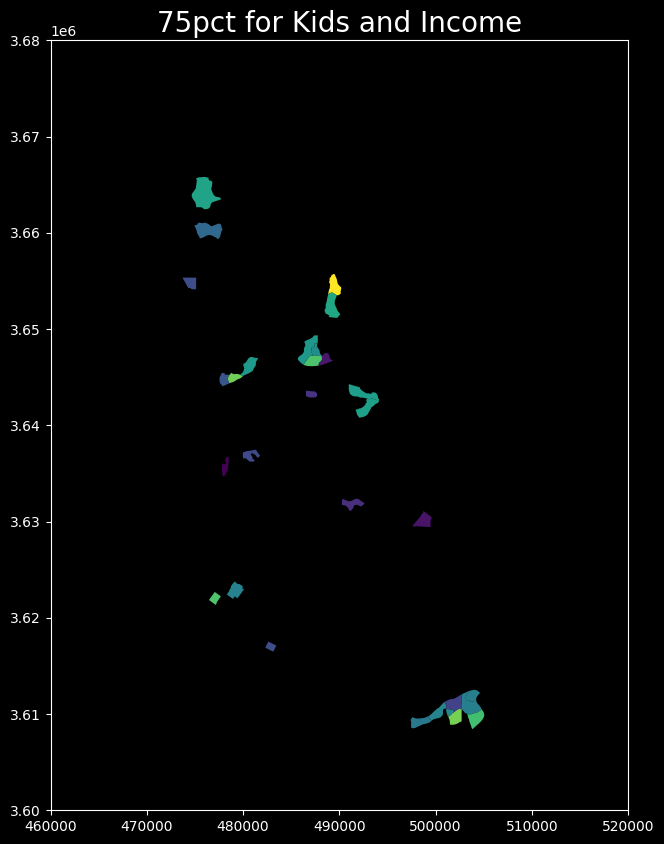

In [53]:
# Child Density for top 20% of income
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# Set the x and y limits to the specified bounds
ax.set_xlim(460000, 520000)
ax.set_ylim(3600000, 3680000)

t = df[ (df.mi_pct >= .70) & ( df.cd_pct > .70)]

t.to_file(dd / "cd_mi_70.geojson", driver='GeoJSON')

t.plot(ax=ax, column='metric')
ax.set_title('75pct for Kids and Income', fontdict={'fontsize': 20, 'fontweight': 'medium'})


Text(0.5, 1.0, '75pct for Kids, 20pct Income')

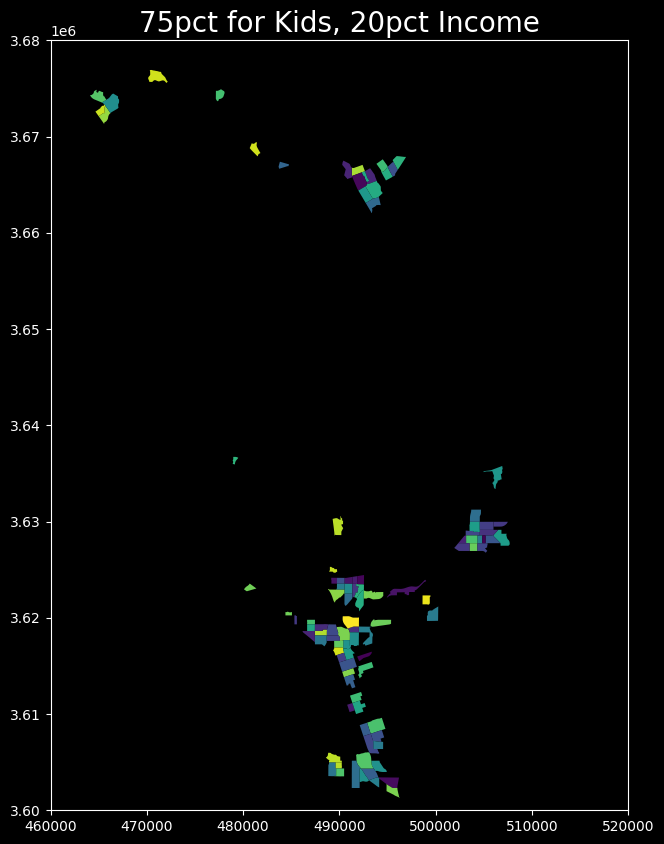

In [54]:
# Child Density for top 20% of income
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# Set the x and y limits to the specified bounds
ax.set_xlim(460000, 520000)
ax.set_ylim(3600000, 3680000)

t = df[ (df.mi_pct <= .20) & ( df.cd_pct > .70)]

t.to_file(dd / "cd_mi_20.geojson", driver='GeoJSON')

t.plot(ax=ax, column='metric')
ax.set_title('75pct for Kids, 20pct Income', fontdict={'fontsize': 20, 'fontweight': 'medium'})

# Time Series 






In [55]:
import geopandas as gpd
from pathlib import Path
import requests
import zipfile
import io

# Define the URLs for 2020 and 2010 tract shapefiles
# They changed the tracts for 2020. 
urls = {
    "2020": "https://www2.census.gov/geo/tiger/TIGER2020/TRACT/tl_2020_06_tract.zip",
    "2010": "https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_06_tract10.zip"
}

# Define the directory to save the shapefiles
data_dir = Path("data/shapefiles")
data_dir.mkdir(parents=True, exist_ok=True)

# Download and extract shapefiles
shapefiles = {}
for year, url in urls.items():
    response = requests.get(url, verify=False)
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall(data_dir / year)
    shapefiles[year] = gpd.read_file(data_dir / year)

# Access the 2020 and 2010 tract shapefiles
tract_2020 = shapefiles["2020"]
tract_2010 = shapefiles["2010"]


/Users/eric/proj/league/data/marketing-data/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.census.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/eric/proj/league/data/marketing-data/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.census.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [56]:
# Access the 2020 and 2010 tract shapefiles
tract_2020 = shapefiles["2020"]
tract_2010 = shapefiles["2010"]

tract_2010 = tract_2010[tract_2010.COUNTYFP10 == '073']
tract_2010 = tract_2010.rename(columns={'GEOID10':'geoid', 'ALAND': 'area'})
tract_2010['geoid'] = '14000US' + tract_2010['geoid']

tract_2020 = tract_2020[tract_2020.COUNTYFP == '073']
tract_2020 = tract_2020.rename(columns={'GEOID':'geoid', 'ALAND': 'area'})
tract_2020['geoid'] = '14000US' + tract_2020['geoid']

tract_2010.head()


,STATEFP10,COUNTYFP10,TRACTCE10,geoid,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
2052,06,073,002702,14000US06073002702,27.02,Census Tract 27.02,G5020,S,1359565,0,+32.7542098,-117.0728017,"POLYGON ((-117.07405 32.74813, -117.07458 32.7..."
2053,06,073,002710,14000US06073002710,27.10,Census Tract 27.10,G5020,S,685713,0,+32.7439483,-117.0844892,"POLYGON ((-117.08801 32.748, -117.08799 32.749..."
2054,06,073,002707,14000US06073002707,27.07,Census Tract 27.07,G5020,S,383554,0,+32.7529867,-117.0895143,"POLYGON ((-117.08799 32.7495, -117.08811 32.74..."
2055,06,073,002705,14000US06073002705,27.05,Census Tract 27.05,G5020,S,1227304,0,+32.7338692,-117.0835759,"POLYGON ((-117.0849 32.72595, -117.08492 32.72..."
2056,06,073,002202,14000US06073002202,22.02,Census Tract 22.02,G5020,S,486884,0,+32.7523973,-117.1051018,"POLYGON ((-117.10764 32.74967, -117.10792 32.7..."


In [57]:
ter = gpd.GeoDataFrame(territories[['cid', 'isochrone']].copy(), geometry='isochrone')
ter10 = ter.sjoin(tract_2010[['geoid', 'geometry']].to_crs(ter.crs), predicate='intersects')
ter10 = ter10[['cid', 'geoid']].copy()


ter20 = ter.sjoin(tract_2020[['geoid', 'geometry']].to_crs(ter.crs), predicate='intersects')
ter20 = ter20[['cid', 'geoid']].copy()

In [58]:
tc_geo = ter_chld.geoid.unique()

In [ ]:
from census import Census 
from us import states
import pandas as pd

api_key = "8a695c2cf16a80e406501af3c21a7492c85844a8"
col = "B09001_008E" # 12 to 14
 # B09001_009E # 15 to 17


def get_census_year(year):

    c = Census(api_key, year=year)

    r = c.acs5.get(('GEO_ID', col),  {'for': 'tract: *', 'in': 'state:06 county:073'})
    df = pd.DataFrame(r)
    df.rename(columns={ col:year, 'GEO_ID':'geoid'}, inplace=True)
    df['geoid'] = df['geoid'].str.replace('1400000US', '14000US', regex=False)
    return df[['geoid', year]]


frames10 = [ get_census_year(year) for year in range(2010, 2020)]
frames20 = [ get_census_year(year) for year in range(2020, 2024)]



In [ ]:
from functools import reduce

# Merge all dataframes in the frames list on the 'geoid' column
census10 = reduce(lambda left, right: pd.merge(left, right, on='geoid', how='outer'), frames10)
census20 = reduce(lambda left, right: pd.merge(left, right, on='geoid', how='outer'), frames20)

t10 = ter10.merge(census10, on='geoid', how='left').drop(columns=['geoid']).groupby('cid').sum().sort_index()
t20 = ter20.merge(census20, on='geoid', how='left').drop(columns=['geoid']).groupby('cid').sum().sort_index()

tc_ts = pd.concat([t10, t20], axis=1)


tc_ts

In [ ]:


t = tc_ts

t = t.groupby('cid').sum()
 
# Plotting the multi-line chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each row as a line
for index, row in t.iterrows():
    ax.plot(range(2010, 2024), row.values, label=index)

# Add labels, title, and legend
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_title('12 to 14 YO per territory per year', fontsize=16)
ax.legend(title='CID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
 

NameError: name 'tc_ts' is not defined

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
tc_ts_transposed = tc_ts.T.reset_index().rename(columns={"index": "Year"})
tc_ts_transposed = pd.melt(tc_ts_transposed, id_vars=["Year"], var_name="CID", value_name="Value")

plt.figure(figsize=(12, 8))
sns.lineplot(data=tc_ts_transposed, x="Year", y="Value", hue="CID", palette="tab10")
plt.title("12 to 14 YO per territory per year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(title="CID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
